In [1]:
import pandas as pd
import psutil

from freeholdforecast.tasks.etl_ml_task import ETL_ML_Task

pd.options.display.max_columns = 100

task = ETL_ML_Task()


2022-12-14 17:10:50 INFO ETL_ML_Task Initializing task for ohio-hamilton with run date 2022-07-01
2022-12-14 17:10:50 INFO ETL_ML_Task Train years: 2
2022-12-14 17:10:50 INFO ETL_ML_Task Train dates: 2020-06-01 to 2022-06-01
2022-12-14 17:10:50 INFO ETL_ML_Task Test dates: 2022-07-01 to 2022-07-01


In [2]:
task._get_df_raw()


2022-12-14 17:10:50 INFO ETL_ML_Task Loading existing raw data
2022-12-14 17:10:52 INFO ETL_ML_Task Total parcels: 282426
2022-12-14 17:10:52 INFO ETL_ML_Task Total sales: 502840


In [3]:
task._get_df_encoded()


2022-12-14 17:10:52 INFO ETL_ML_Task Loading existing encoded data


In [4]:
task._get_df_prepared()


2022-12-14 17:10:52 INFO ETL_ML_Task Loading existing prepared data
2022-12-14 17:10:54 INFO ETL_ML_Task Splitting data


In [18]:
# task.df_prepared.groupby('months_since_last_sale', as_index=False).size()
task.df_prepared.describe().astype(object)

,sale_in_3_months,next_sale_amount,month,months_since_last_sale,Book,Plat,Parcel,ParcelID,Tax District,Owner Name 1,Owner Name 2,Land Value,Building Value,Property Class,House #,Street Name,Street Suffix,Zip Code,Month of Sale,Day of Sale,Year of Sale,# of Parcels Sold,Sale Price,Valid Sale,Conveyance #,Deed Type,Appraisal Area,PriorOwner,PropertyNumber,Parid
count,8256270.0,456178.0,8256270.0,8256270.0,8256270.0,8256270.0,8256270.0,8256270.0,8256270.0,8256270.0,8256270.0,8256270.0,8256270.0,8256270.0,8256270.0,8256270.0,8256270.0,8256270.0,8256270.0,8256270.0,8256270.0,8256270.0,8256270.0,8256270.0,8256270.0,8256270.0,8256270.0,8256270.0,8256270.0,8256270.0
mean,0.012337,352235.386452,6.901632,126.89926,589.634565,58.332884,187.037208,0.044375,61.152164,178381.460238,36233.621019,10134.301879,20503.969418,98.323168,16468.892702,10805.812441,26.495733,15818.717238,5.697908,15.086545,12.587565,7.843319,12227.07977,2.837383,171307.365144,46.527449,68.544496,144643.985589,122920.429092,140964.701999
std,0.110383,1072027.640268,3.279652,84.488928,172.237963,68.789797,181.612631,0.418671,32.241736,103882.992773,25123.718257,5730.638172,15485.443482,20.57281,9247.931836,6067.495818,17.335019,10113.783283,3.258606,9.153221,7.058544,13.590595,8742.378274,0.54625,102135.304972,7.593067,35.281676,69870.889729,58743.408911,81605.116874
min,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,139900.0,4.0,47.0,518.0,4.0,60.0,0.0,31.0,87877.0,2060.0,6021.0,3677.0,104.0,9351.0,5719.0,10.0,5714.0,3.0,7.0,7.0,2.0,4448.0,3.0,82238.0,50.0,36.0,83323.0,72390.0,70239.0
50%,0.0,210000.0,7.0,125.0,663.0,24.0,133.0,0.0,50.0,178327.0,57438.0,9193.0,22707.0,104.0,15129.0,10859.0,21.0,18819.0,6.0,15.0,13.0,2.0,10356.0,3.0,162507.0,50.0,87.0,170842.0,145666.0,140867.0
75%,0.0,330000.0,10.0,199.0,704.0,95.0,256.0,0.0,87.0,268487.0,57438.0,14237.0,35751.0,104.0,23805.0,15834.0,46.0,25642.0,8.0,23.0,19.0,2.0,20060.0,3.0,262861.0,50.0,101.0,208871.0,176572.0,211691.0
max,1.0,100000000.0,12.0,298.0,757.0,275.0,1509.0,4.0,136.0,356390.0,57440.0,21624.0,41227.0,143.0,34576.0,21449.0,73.0,25642.0,11.0,30.0,24.0,77.0,28221.0,3.0,349033.0,53.0,101.0,208871.0,176572.0,282425.0


In [5]:
task._train_models()


2022-12-14 17:10:55 INFO ETL_ML_Task Total fit minutes: 120
2022-12-14 17:10:55 INFO ETL_ML_Task Job fit minutes: 10
2022-12-14 17:10:55 INFO ETL_ML_Task Job memory limit (MB): 3072
2022-12-14 17:10:55 INFO ETL_ML_Task Initialize AutoML for sale_in_3_months with 8 jobs
2022-12-14 17:10:55 INFO ETL_ML_Task Initialize AutoML for next_sale_amount with 4 jobs
2022-12-14 17:11:01 INFO ETL_ML_Task Model sale_in_3_months auto-sklearn results:
  Dataset name: 2238cc1d-7b14-11ed-bf2c-0242ac110002
  Metric: f1
  Best validation score: 0.815984
  Number of target algorithm runs: 75
  Number of successful target algorithm runs: 52
  Number of crashed target algorithm runs: 0
  Number of target algorithms that exceeded the time limit: 17
  Number of target algorithms that exceeded the memory limit: 6

2022-12-14 17:11:02 INFO ETL_ML_Task Metrics with training data:
2022-12-14 17:12:51 INFO ETL_ML_Task Pred labels: 93648/1040182 (9.00%)
2022-12-14 17:12:52 INFO ETL_ML_Task Precision: 0.95
2022-12-14

/home/vscode/.local/share/virtualenvs/freehold-forecast-zrIN4e5_/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


2022-12-14 17:15:48 INFO ETL_ML_Task Model next_sale_amount auto-sklearn results:
  Dataset name: 22298d5f-7b14-11ed-bf2d-0242ac110002
  Metric: r2
  Best validation score: 0.999627
  Number of target algorithm runs: 153
  Number of successful target algorithm runs: 134
  Number of crashed target algorithm runs: 0
  Number of target algorithms that exceeded the time limit: 13
  Number of target algorithms that exceeded the memory limit: 6

2022-12-14 17:15:48 INFO ETL_ML_Task Metrics with training data:
2022-12-14 17:16:49 INFO ETL_ML_Task R2: 1.00
2022-12-14 17:16:49 INFO ETL_ML_Task MAE: 2260.18
2022-12-14 17:16:49 INFO ETL_ML_Task MAPE: 1.44
2022-12-14 17:16:49 INFO ETL_ML_Task Metrics with testing data:
2022-12-14 17:16:50 INFO ETL_ML_Task R2: 1.00
2022-12-14 17:16:50 INFO ETL_ML_Task MAE: 4313.84
2022-12-14 17:16:50 INFO ETL_ML_Task MAPE: 30.30


In [6]:
task.df_train.next_sale_amount.mean()

351436.8937302567

<IPython.core.display.Javascript object>


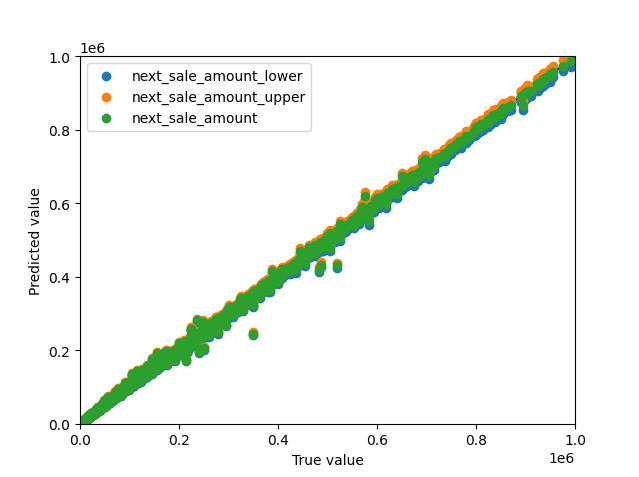

2022-12-14 17:16:59 INFO ETL_ML_Task Metrics for next_sale_amount
2022-12-14 17:16:59 INFO ETL_ML_Task MAE: 4188.45
2022-12-14 17:16:59 INFO ETL_ML_Task MAE/MT: 0.01
2022-12-14 17:16:59 INFO ETL_ML_Task MPE: -0.00
2022-12-14 17:16:59 INFO ETL_ML_Task MAPE: 0.02
2022-12-14 17:16:59 INFO ETL_ML_Task SMAPE: 1.54
2022-12-14 17:16:59 INFO ETL_ML_Task Pred interval: 34392.35


/tmp/ipykernel_14049/4078865028.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp["y_true"] = y_true
/tmp/ipykernel_14049/4078865028.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp["y_pred"] = y_pred
/tmp/ipykernel_14049/4078865028.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexi

In [7]:
import matplotlib.pyplot as plt
import mlflow
import numpy as np

from scipy import stats
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

# def mean_absolute_percentage_error(y_true, y_pred): 
#     y_true, y_pred = np.array(y_true), np.array(y_pred)
#     return np.mean(np.abs((y_true - y_pred) / y_true))

def mean_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean((y_true - y_pred) / y_true)

def symmetric_mean_absolute_percentage_error(y_true, y_pred):
    return 100/len(y_true) * np.sum(2 * np.abs(y_pred - y_true) / (np.abs(y_true) + np.abs(y_pred)))

def get_prediction_interval(y_true, y_pred, pi=0.9):
    sum_errs = np.sum((y_true - y_pred)**2)
    stdev = np.sqrt(1 / (len(y_true) - 2) * sum_errs)
    one_minus_pi = 1 - pi
    ppf_lookup = 1 - (one_minus_pi / 2)
    z_score = stats.norm.ppf(ppf_lookup)
    return z_score * stdev

%matplotlib notebook

total_plots = len(task.regression_label_names)
fig, axs = plt.subplots(total_plots)

sale_in_column = "sale_in_3_months"

for label_index, label_name in enumerate(task.regression_label_names):
#     df_temp = task.df_train.loc[task.df_train[label_name].notna()]
    df_temp = task.df_test.loc[task.df_test[label_name].notna()]
    
    X_temp = df_temp.drop(columns=task.label_names).to_numpy()
    y_true = df_temp[label_name].values
    
    model = mlflow.sklearn.load_model(task.model_directories[sale_in_column])
    y_pred_sale_in_months = model.predict(X_temp)
    
    model = mlflow.sklearn.load_model(task.model_directories[label_name])
    y_pred = model.predict(X_temp)
    
    y_mape = np.abs((y_true - y_pred) / y_true)
    y_mape_plow = np.percentile(y_mape, 1)
    y_mape_phigh = np.percentile(y_mape, 99)
    
    df_temp["y_true"] = y_true
    df_temp["y_pred"] = y_pred
    df_temp["y_mape"] = y_mape
    
    df_temp = df_temp.loc[(df_temp.y_mape >= y_mape_plow) & (df_temp.y_mape <= y_mape_phigh)]
#     df_temp = df_temp.loc[
#         (y_pred_sale_in_months == 1) &
#         (abs(y_true - np.mean(y_true)) < np.std(y_true)) &
#         (abs(y_pred - np.mean(y_pred)) < np.std(y_pred))
#     ]
    
#     if label_name == "next_sale_months":
#         df_temp = df_temp.loc[df_temp.y_pred <= 12]

    y_true = df_temp["y_true"]
    y_pred = df_temp["y_pred"]

    task.logger.info(f"Metrics for {label_name}")
    
    mae_value = mean_absolute_error(y_true, y_pred)
    task.logger.info(f"MAE: {mae_value:.2f}")
    
    maemt_value = mae_value / np.mean(y_true)
    task.logger.info(f"MAE/MT: {maemt_value:.2f}")
    
    mpe_value = mean_percentage_error(y_true, y_pred)
    task.logger.info(f"MPE: {mpe_value:.2f}")

    mape_value = mean_absolute_percentage_error(y_true, y_pred)
    task.logger.info(f"MAPE: {mape_value:.2f}")

    smape_value = symmetric_mean_absolute_percentage_error(y_true, y_pred)
    task.logger.info(f"SMAPE: {smape_value:.2f}")

    prediction_interval = get_prediction_interval(y_true, y_pred)
    task.logger.info(f"Pred interval: {prediction_interval:.2f}")

    y_pred_interval = df_temp.y_pred * mape_value
#     y_pred_interval = prediction_interval
    y_pred_lower = y_pred - y_pred_interval
    y_pred_upper = y_pred + y_pred_interval
    
    if label_name == "next_sale_amount":
        limit_value = 1000000
    elif label_name == "next_sale_months":
        limit_value = 18
#     limit_value = max(y_true + y_pred)
    
    plot_min_max = [0, limit_value]
    axs_plot = axs if total_plots == 1 else axs[label_name]
    axs_plot.plot(plot_min_max, plot_min_max, c="k", zorder=0)
    axs_plot.scatter(y_true, y_pred_lower, label=f"{label_name}_lower")
    axs_plot.scatter(y_true, y_pred_upper, label=f"{label_name}_upper")
    axs_plot.scatter(y_true, y_pred, label=label_name)
    axs_plot.set_xlim(0, limit_value)
    axs_plot.set_ylim(0, limit_value)
#     axs_plot.set_title(label_name)

    axs_plot.set_xlabel("True value")
    axs_plot.set_ylabel("Predicted value")
    axs_plot.legend()
    
plt.show()


In [8]:
import mlflow
import os

from datetime import datetime
from dateutil.rrule import rrule, MONTHLY
from pandarallel import pandarallel
from sklearn.metrics import mean_absolute_percentage_error

# pandarallel.initialize(nb_workers=task.cpu_count, progress_bar=True)

# df_current = (
#     task.df_raw_encoded
#         .sort_values(by=["Parid", "last_sale_date"], ascending=True)
#         .drop_duplicates(subset="Parid", keep="last")
#         .reset_index(drop=True)
# )

# def get_parcel_predict_data(last_sale_date):
#     return len([x for x in rrule(dtstart=last_sale_date, until=current_date, freq=MONTHLY)])

# current_date = datetime.now().replace(day=1)
# df_current["year"] = current_date.year
# df_current["month"] = current_date.month
# df_current["months_since_last_sale"] = df_current["last_sale_date"].parallel_apply(get_parcel_predict_data)

df_current = task.df_test.copy()

train_columns = list(task.df_train.drop(columns=task.label_names).columns)
X_current = df_current[train_columns].to_numpy()

for label_name in task.classification_label_names:
    task.logger.info(f"Loading predictions for {label_name}")
    model = mlflow.sklearn.load_model(task.model_directories[label_name])
    
    pred_label_name = f"pred_{label_name}"
    df_current[pred_label_name] = y_pred_proba = [y[1] for y in model.predict_proba(X_current)]

    for pred_proba in [0.5, 0.6, 0.7, 0.8, 0.9]:
        predicted_parcels = len(df_current.loc[df_current[pred_label_name] > pred_proba])
        task.logger.info(f"Predicted with proba {pred_proba}: {predicted_parcels}")
    
    df_current = df_current.loc[df_current[pred_label_name] > 0.5]
    
    y_pred_current_low = np.percentile(df_current[pred_label_name], 5)
    y_pred_current_high = np.percentile(df_current[pred_label_name], 95)
    df_current = df_current.loc[
        (df_current[pred_label_name] > y_pred_current_low) &
        (df_current[pred_label_name] < y_pred_current_high)
    ]

X_current = df_current[train_columns].to_numpy()

for label_name in task.regression_label_names:
    task.logger.info(f"Loading predictions for {label_name}")
    model = mlflow.sklearn.load_model(task.model_directories[label_name])
    
    pred_label_name = f"pred_{label_name}"
    df_current[pred_label_name] = model.predict(X_current)
    
    df_train = task.df_train.loc[task.df_train[label_name].notna()]
    X_train = df_train.drop(columns=task.label_names).to_numpy()
    y_train = df_train[label_name].values
    y_pred_train = model.predict(X_train)
    
    df_train["y_pred_train"] = y_pred_train
    y_mape = np.abs((y_train - y_pred_train) / y_train)
    df_train = df_train.loc[y_mape < np.std(y_mape)]
    
    y_train = df_train[label_name].values
    y_pred_train = df_train.y_pred_train

    mpe_value = mean_percentage_error(y_train, y_pred_train)
    task.logger.info(f"MPE for {label_name}: {mape_value:.2f}")

    mape_value = mean_absolute_percentage_error(y_train, y_pred_train)
    task.logger.info(f"MAPE for {label_name}: {mape_value:.2f}")

    prediction_interval = get_prediction_interval(y_train, y_pred_train)
    task.logger.info(f"Pred interval: {prediction_interval:.2f}")
    
    y_pred_current_interval = df_current[pred_label_name] * mape_value

    df_current[f"{pred_label_name}_lower"] = df_current[pred_label_name] - y_pred_current_interval
    df_current[f"{pred_label_name}_upper"] = df_current[pred_label_name] + y_pred_current_interval
    
    y_pred_current_low = np.percentile(df_current[pred_label_name], 5)
    y_pred_current_high = np.percentile(df_current[pred_label_name], 95)
    df_current = df_current.loc[
        (df_current[pred_label_name] > y_pred_current_low) &
        (df_current[pred_label_name] < y_pred_current_high)
    ]

df_current


2022-12-14 17:17:00 INFO ETL_ML_Task Loading predictions for sale_in_3_months
2022-12-14 17:17:33 INFO ETL_ML_Task Predicted with proba 0.5: 1914
2022-12-14 17:17:33 INFO ETL_ML_Task Predicted with proba 0.6: 1599
2022-12-14 17:17:33 INFO ETL_ML_Task Predicted with proba 0.7: 592
2022-12-14 17:17:33 INFO ETL_ML_Task Predicted with proba 0.8: 26
2022-12-14 17:17:33 INFO ETL_ML_Task Predicted with proba 0.9: 0
2022-12-14 17:17:33 INFO ETL_ML_Task Loading predictions for next_sale_amount
2022-12-14 17:18:36 INFO ETL_ML_Task MPE for next_sale_amount: 0.02
2022-12-14 17:18:36 INFO ETL_ML_Task MAPE for next_sale_amount: 0.04
2022-12-14 17:18:36 INFO ETL_ML_Task Pred interval: 15997.32


/tmp/ipykernel_14049/1694725067.py:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train["y_pred_train"] = y_pred_train


,sale_in_3_months,next_sale_amount,month,months_since_last_sale,Book,Plat,Parcel,ParcelID,Tax District,Owner Name 1,Owner Name 2,Land Value,Building Value,Property Class,House #,Street Name,Street Suffix,Zip Code,Month of Sale,Day of Sale,Year of Sale,# of Parcels Sold,Sale Price,Valid Sale,Conveyance #,Deed Type,Appraisal Area,PriorOwner,PropertyNumber,Parid,pred_sale_in_3_months,pred_next_sale_amount,pred_next_sale_amount_lower,pred_next_sale_amount_upper
18895,1,530000.0,7,26,748.0,124.0,114.0,0.0,78.0,46466.0,57438.0,19072.0,20253.0,104.0,32408.0,20334.0,46.0,139.0,4.0,28.0,22.0,2.0,15661.0,3.0,131383.0,50.0,96.0,187506.0,168711.0,270319.0,0.581356,527611.020508,507049.332665,548172.708351
26395,1,276000.0,7,72,724.0,164.0,44.0,0.0,105.0,4547.0,57438.0,8647.0,228.0,104.0,29449.0,20623.0,8.0,14135.0,6.0,12.0,18.0,2.0,4754.0,3.0,16047.0,24.0,89.0,152535.0,150790.0,242656.0,0.659834,278256.220703,267412.213796,289100.227610
27655,1,220000.0,7,126,536.0,19.0,38.0,0.0,31.0,53601.0,57438.0,20017.0,32386.0,32.0,1399.0,12270.0,8.0,9106.0,0.0,23.0,14.0,2.0,18339.0,1.0,192381.0,50.0,9.0,172008.0,44946.0,74386.0,0.684716,220070.803711,211494.358198,228647.249224
30265,1,110000.0,7,243,685.0,130.0,158.0,0.0,59.0,44079.0,30341.0,6364.0,38672.0,104.0,20974.0,1852.0,7.0,25642.0,3.0,29.0,4.0,2.0,577.0,3.0,231515.0,50.0,101.0,208871.0,176572.0,177053.0,0.561995,114659.413086,110190.986597,119127.839575
39385,1,426000.0,7,76,708.0,2.0,134.0,0.0,104.0,230972.0,57438.0,17329.0,11940.0,104.0,12448.0,6905.0,46.0,6003.0,2.0,21.0,18.0,2.0,10932.0,3.0,5032.0,50.0,100.0,116749.0,137299.0,221631.0,0.685795,426439.213867,409820.322944,443058.104790
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8242843,1,362765.0,7,2,691.0,25.0,348.0,0.0,81.0,233673.0,57438.0,21624.0,41227.0,96.0,31021.0,717.0,39.0,0.0,4.0,18.0,24.0,2.0,21014.0,3.0,188527.0,50.0,38.0,199182.0,120472.0,194501.0,0.668562,346763.402344,333249.581447,360277.223241
8243228,1,175200.0,7,2,236.0,2.0,186.0,0.0,0.0,44817.0,57438.0,7870.0,39372.0,108.0,24196.0,16040.0,53.0,9478.0,4.0,9.0,24.0,2.0,4122.0,1.0,187831.0,45.0,50.0,2695.0,7480.0,16345.0,0.729680,187718.497803,180402.863739,195034.131867
8243963,1,295000.0,7,2,683.0,98.0,134.0,0.0,58.0,300676.0,57438.0,16399.0,4059.0,104.0,32946.0,5279.0,46.0,13864.0,4.0,7.0,24.0,2.0,2349.0,3.0,187538.0,50.0,22.0,139451.0,99960.0,162147.0,0.656930,268481.703125,258018.621884,278944.784366
8244390,1,205000.0,7,2,756.0,3.0,360.0,0.0,72.0,227359.0,57438.0,8744.0,36747.0,104.0,6677.0,7113.0,53.0,6314.0,4.0,3.0,24.0,2.0,4792.0,3.0,187284.0,50.0,76.0,148166.0,174759.0,280184.0,0.622940,215446.589600,207050.355726,223842.823473


In [22]:
import pickle
from freeholdforecast.common.utils import date_string

df_current_final = df_current.copy()
df_current_final = df_current_final.loc[
    df_current_final.months_since_last_sale > np.percentile(df_current_final.months_since_last_sale, 10)
]

raw_directory = os.path.join("data", "etl", task.run_date, task.county, "2-encoded")
ordinal_encoder_path = os.path.join(raw_directory, "ordinal-encoder.pkl")

with open(ordinal_encoder_path, "rb") as ordinal_encoder_file:
    ordinal_encoder = pickle.load(ordinal_encoder_file)
    
    encoded_columns = list(task.df_raw.drop(columns=task.non_encoded_columns).columns)

    df_current_final_inverse_transform = pd.DataFrame(
        ordinal_encoder.inverse_transform(df_current_final[encoded_columns]),
        columns=encoded_columns,
        index=df_current_final.index,
    )

df_current_final_inverse_transform = (
    df_current_final_inverse_transform
        .join(df_current_final[list(set(list(df_current_final.columns)) - set(encoded_columns))])
)
df_current_final_inverse_transform = df_current_final_inverse_transform[
    sorted(df_current_final_inverse_transform.columns)
].sort_values(by="next_sale_amount")

if sale_in_column in list(df_current_final.columns):
    acc_pred_sale_in_3_months = (
        len(
            df_current_final_inverse_transform[df_current_final_inverse_transform.sale_in_3_months == 1]
        )/len(
            df_current_final_inverse_transform
        )*100
    )
    acc_pred_next_sale_amount = np.mean((1 - np.abs(
        (df_current_final_inverse_transform.next_sale_amount - df_current_final_inverse_transform.pred_next_sale_amount)
        /df_current_final_inverse_transform.next_sale_amount
    ))) * 100

    print(f"Final accuracy of sale_in_3_months: {acc_pred_sale_in_3_months:.1f}%")
    print(f"Final accuracy of next_sale_amount: {acc_pred_next_sale_amount:.1f}%")

# print(len(df_current_final_inverse_transform[df_current_final_inverse_transform.sale_in_3_months == 1]))

df_current_final_inverse_transform.to_csv(f"{task.county}_{date_string(task.test_start_date)}.csv", index=False)
df_current_final_inverse_transform.to_json(f"{task.county}_{date_string(task.test_start_date)}.json", index=False, orient="split")
df_current_final_inverse_transform.astype(object)
# df_current_final_inverse_transform.astype(object).describe()

Final accuracy of sale_in_3_months: 98.7%
Final accuracy of next_sale_amount: 99.0%


,# of Parcels Sold,Appraisal Area,Book,Building Value,Conveyance #,Day of Sale,Deed Type,House #,Land Value,Month of Sale,Owner Name 1,Owner Name 2,Parcel,ParcelID,Parid,Plat,PriorOwner,Property Class,PropertyNumber,Sale Price,Street Name,Street Suffix,Tax District,Valid Sale,Year of Sale,Zip Code,month,months_since_last_sale,next_sale_amount,pred_next_sale_amount,pred_next_sale_amount_lower,pred_next_sale_amount_upper,pred_sale_in_3_months,sale_in_3_months
7322875,1,MOUNT AUBURN,090,15540.0,137971,18,WD,2008,10080.0,04,FELDKAMP JOSEPH M,nan,0053,00,0900003005300,0003,CAINE ARTHUR,510,090-0003-0053-00,39000,BURNET,AVE,1,Y,2017,45219-0000,7,63,39000.0,74394.947693,71495.6798,77294.215586,0.741063,1
2078185,1,WEST PRICE HILL,179,9290.0,238813.0,16,WD,929,15710.0,07,JUAREZ ISAIAS,nan,0048,00,1790076004800,0076,BURNETT GROUP LLC,510,179-0076-0048-00,33000,HARRIS,AVE,1,Y,2020,45205-0000,7,24,50000.0,63321.58252,60853.858073,65789.306966,0.63998,1
1566175,1,MOUNT WASHINGTON,002,111400.0,157117,16,WD,1734,20000.0,11,CATRON AMBER N & KRISTEN RENEE,nan,0038,00,0020002003800,0002,BAMBER JEFF M,510,002-0002-0038-00,118250,MARQUETTE,AVE,1,Y,2017,45230-0000,7,56,59125.0,62738.336426,60293.341838,65183.331013,0.755898,1
6151495,1,MOUNT HEALTHY,593,174900.0,32736.0,27,WD,7440,35080.0,03,MOXLEY CANDACE,& DIANA ROSEY,0007,00,5930007000700,0007,FOUR WAY INC,430,593-0007-0007-00,135000,HAMILTON,AVE,124,Y,2012,45231-0000,7,124,60000.0,62535.658569,60098.562602,64972.754537,0.705418,1
6939595,1,NORTH COLLEGE HILL,595,28120.0,91467.0,27,WD,1275,25880.0,08,ANDERSON LEAH,nan,0056,00,5950011005600,0011,SMITH J MARK & BONNIE L,510,595-0011-0056-00,70000,GALBRAITH,RD,135,Y,2015,45231-0000,7,83,60000.0,64167.47644,61666.786407,66668.166473,0.635966,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8104445,6,FOREST PARK,591,nan,255072,11,WD,1339,nan,01,MARONDA HOMES OF CINCINNATI LLC,nan,0093,00,5910017009300,0017,CMMH HOLDING LLC,500,591-0017-0093-00,272322,WAYCROSS,RD,239,Y,2021,00000-0000,7,18,NaN,341160.436523,327864.970493,354455.902553,0.599781,0
8104468,6,FOREST PARK,591,nan,255072,11,WD,1345,nan,01,MARONDA HOMES OF CINCINNATI LLC,nan,0092,00,5910017009200,0017,CMMH HOLDING LLC,500,591-0017-0092-00,272322,WAYCROSS,RD,239,Y,2021,00000-0000,7,18,NaN,341221.067383,327923.238489,354518.896276,0.599781,0
8136278,35,MIAMI TOWNSHIP,570,nan,260792,10,LW,2818,nan,03,KMA WESTSIDE DEVELOPMENT INC,nan,0060,00,5700054006000,0054,DRCC LLC,500,570-0054-0060-00,165000,BUCKRIDGE,DR,221,N,2021,00000-0000,7,16,NaN,86709.800537,83330.606809,90088.994266,0.705422,0
8139743,35,MIAMI TOWNSHIP,570,nan,260792,10,LW,3057,nan,03,KMA WESTSIDE DEVELOPMENT INC,nan,0073,00,5700054007300,0054,DRCC LLC,500,570-0054-0073-00,165000,BARNBOUGLE,DR,221,N,2021,00000-0000,7,16,NaN,63371.962952,60902.275114,65841.650789,0.712498,0


In [10]:
# from imblearn.under_sampling import RandomUnderSampler
# from sklearn.inspection import permutation_importance

# model = mlflow.sklearn.load_model(task.model_directories[sale_in_column])

# df_temp = task.df_train.loc[task.df_train[sale_in_column].notna()]
# # df_temp = task.df_test.loc[task.df_test[sale_in_column].notna()]

# X_temp = df_temp.drop(columns=task.label_names).to_numpy()
# y_temp = df_temp[sale_in_column].values

# X_temp, y_temp = task.rus.fit_resample(X_temp, y_temp)

# result = permutation_importance(model, X_temp, y_temp, n_repeats=1, n_jobs=4)

# fig, ax = plt.subplots()
# sorted_idx = result.importances_mean.argsort()
# ax.boxplot(result.importances[sorted_idx].T, vert=False, labels=[train_columns[i] for i in sorted_idx])
# ax.set_title("Permutation Importance of each feature")
# fig.tight_layout()
# plt.show()

# columns = [train_columns[i] for i in sorted_idx]
# columns.reverse()
# # columns.sort()
# print(columns)